# Medical Insurance Cost EDA

## Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import imblearn

## Data Collection

In [2]:
df = pd.read_csv("insurance.csv")

## Data Analysis
- Check head/tail
- Check Data type + shape
- Check Missing Data
- Check Descriptive Statistics

### a) Check head/tail:

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### b) Check Data type + shape:

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### c) Check Missing Data:

In [7]:
### Checking for Missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### d) Check Data Statistics (how the data is distributed)

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Cleaning
- Handling Missing values
- Handling Duplicates
- Data Consistency

### a) Handling Missing values:
- Deleting the Columns with missing data
  ---->(*df=df.dropna(axis=1)*)
- Deleting the Rows with missing data
  ---->(*df=df.dropna(axis=0)*)
- Missing numericals [Mean/ Median] AND Categorical [Mode]
  ---->(*num_col_mean=df[num_col].mean*)
  ---->(*df[num_col]=df[num_col].fillna(num_col_mean)*)


### b) Handling Duplicates:

In [9]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()
df.shape

(1337, 7)

### c) Data Consistency:

In [11]:
### Check the number of unique values of each column:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
#### Above we saw numbers of the unique categories 
#### Now we show those categories to inspect/discover the consistency
## Use: .value_counts() / .unique()
print("Categories in 'Sex' variable:")
print(df['sex'].unique())

print("Categories in 'Smoker' variable:")
print(df['smoker'].unique())

print("Categories in 'Region' variable:")
print(df['region'].unique())

Categories in 'Sex' variable:
['female' 'male']
Categories in 'Smoker' variable:
['yes' 'no']
Categories in 'Region' variable:
['southwest' 'southeast' 'northwest' 'northeast']


##### If any inconsistency, do:
- Standard Cleaning: ---> df['particular_col']=df['particular_col'].str.strip()/ .lower()/ .title()
- Manual Mapping: ---> mapping={'ny': 'New York', 'nyc': 'New York'} ---> df['particular_col']=df['particular_col'].replace(mapping)

## Target distribution

Text(0.5, 1.0, 'Distribution of Medical Charges')

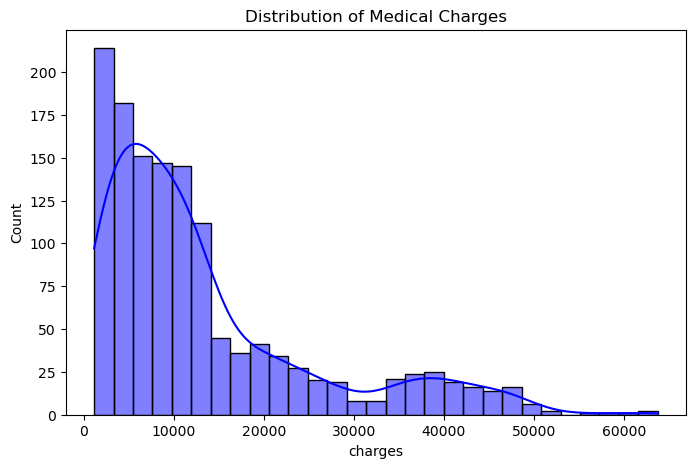

In [13]:
# Distribution of Target 
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Charges')

### Insights
- Target is skewed

## Univariate Analysis

### *Univariate analysis on CATEGORICAL variables/values*

##### Sex Variable Analysis

In [14]:
sex_counts = df['sex'].value_counts()

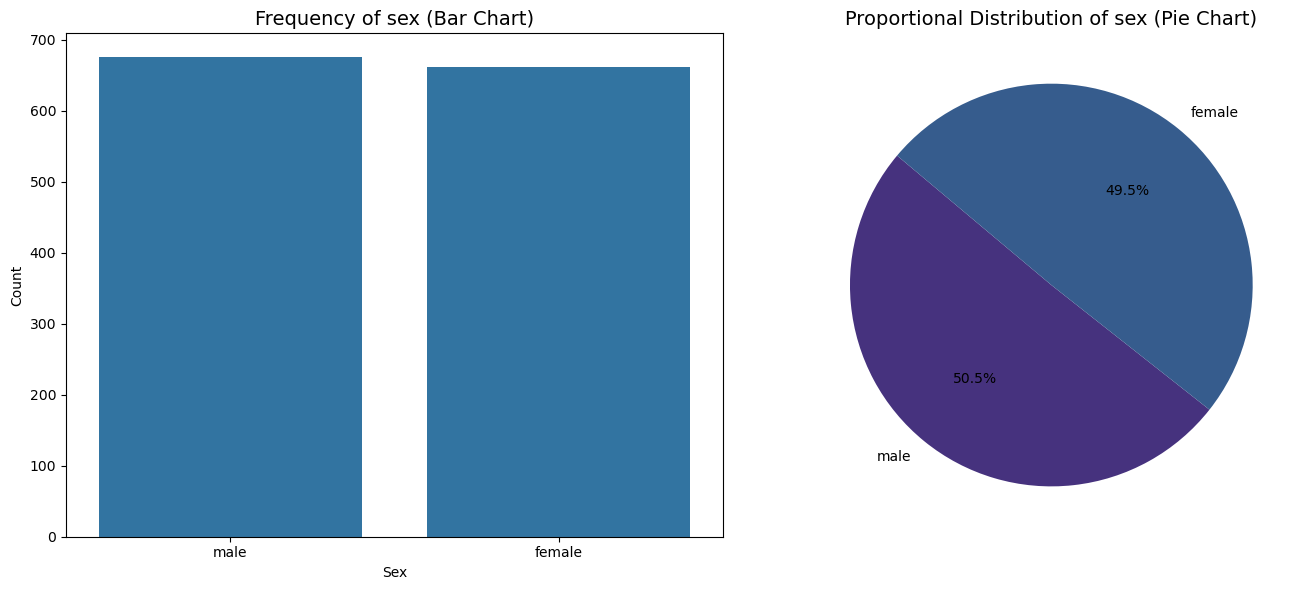

In [15]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# BAR CHART (Count Plot)
sns.countplot(data=df, x='sex', ax=axes[0], order=sex_counts.index)
axes[0].set_title('Frequency of sex (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
# PIE CHART
axes[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of sex (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

#### Smoker variable analysis

In [16]:
smoker_counts = df['smoker'].value_counts()

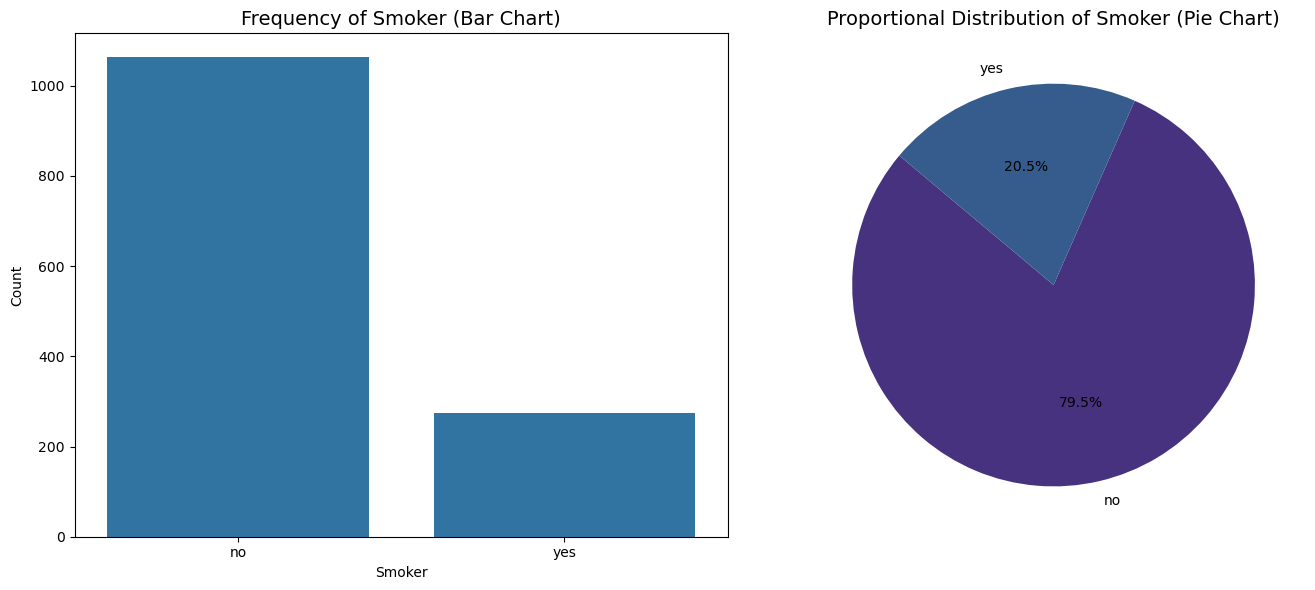

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='smoker', ax=axes[0], order=smoker_counts.index)
axes[0].set_title('Frequency of Smoker (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Smoker (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

#### Region variable analysis

In [18]:
region_counts = df['region'].value_counts()

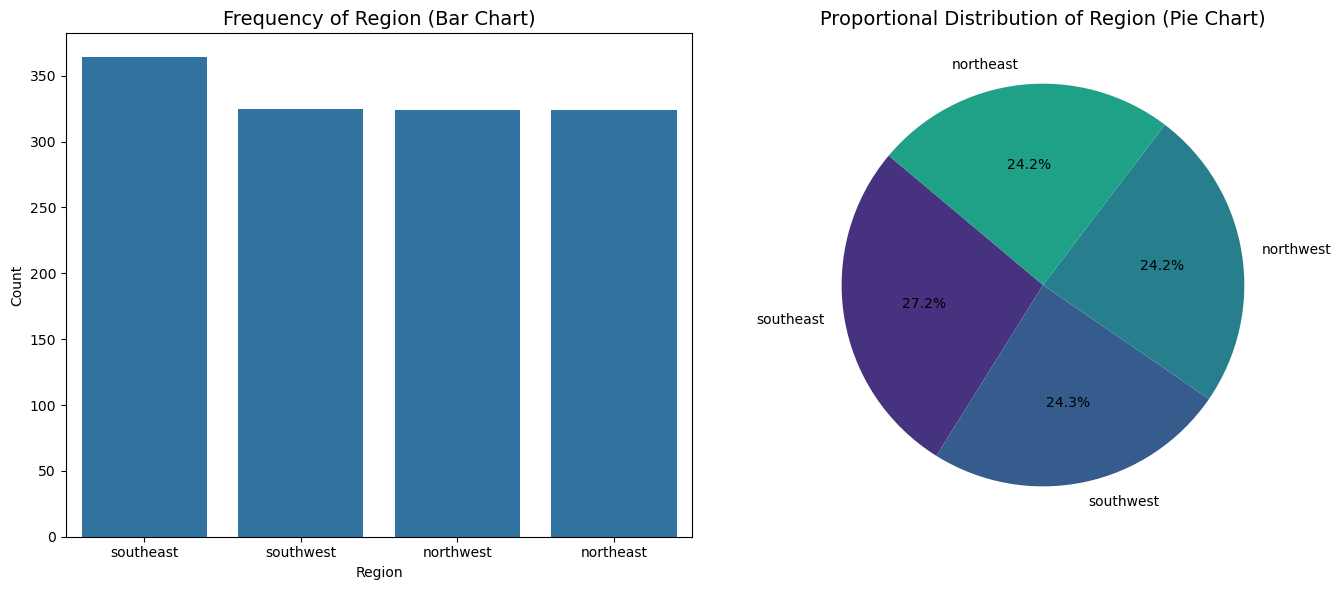

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BAR CHART (Count Plot) ---s
sns.countplot(data=df, x='region', ax=axes[0], order=region_counts.index)
axes[0].set_title('Frequency of Region (Bar Chart)', fontsize=14)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
# --- PIE CHART ---
axes[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', 
            startangle=140, colors=sns.color_palette('viridis'))
axes[1].set_title('Proportional Distribution of Region (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.show()

### *Univariate analysis on NUMERICAL variables/values*

##### BMI Variable Analysis

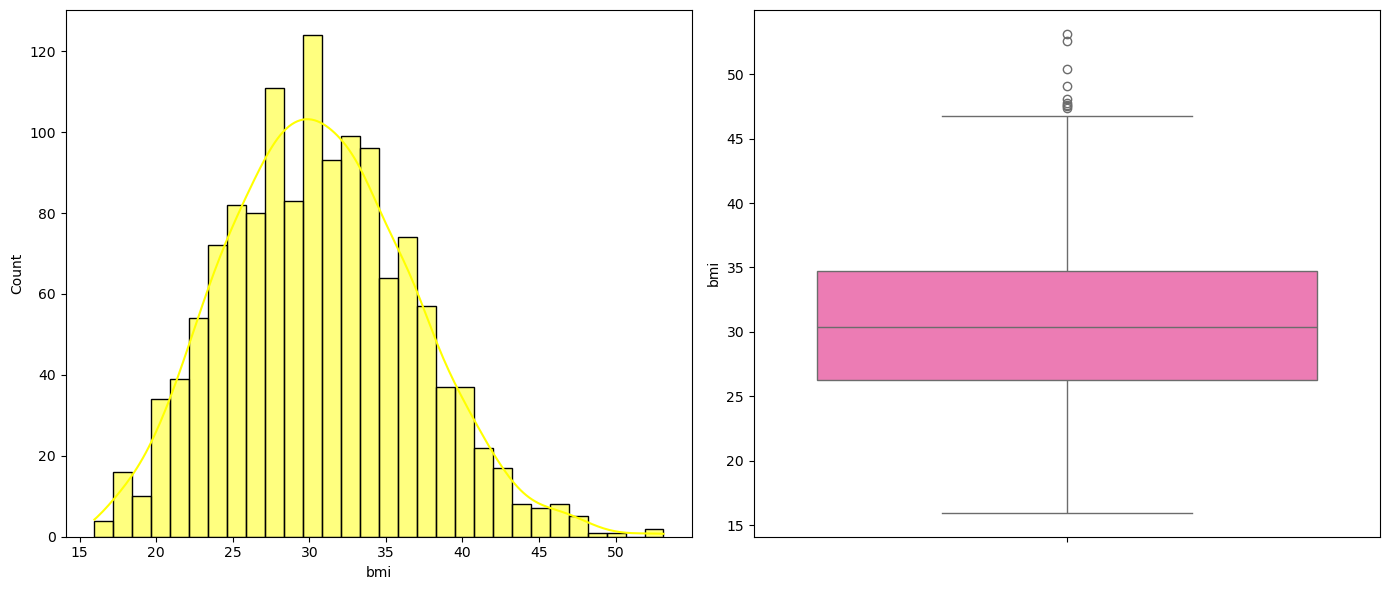

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='bmi', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['bmi'],color='hotpink')

plt.tight_layout()
plt.show()

##### Children Variable Analysis

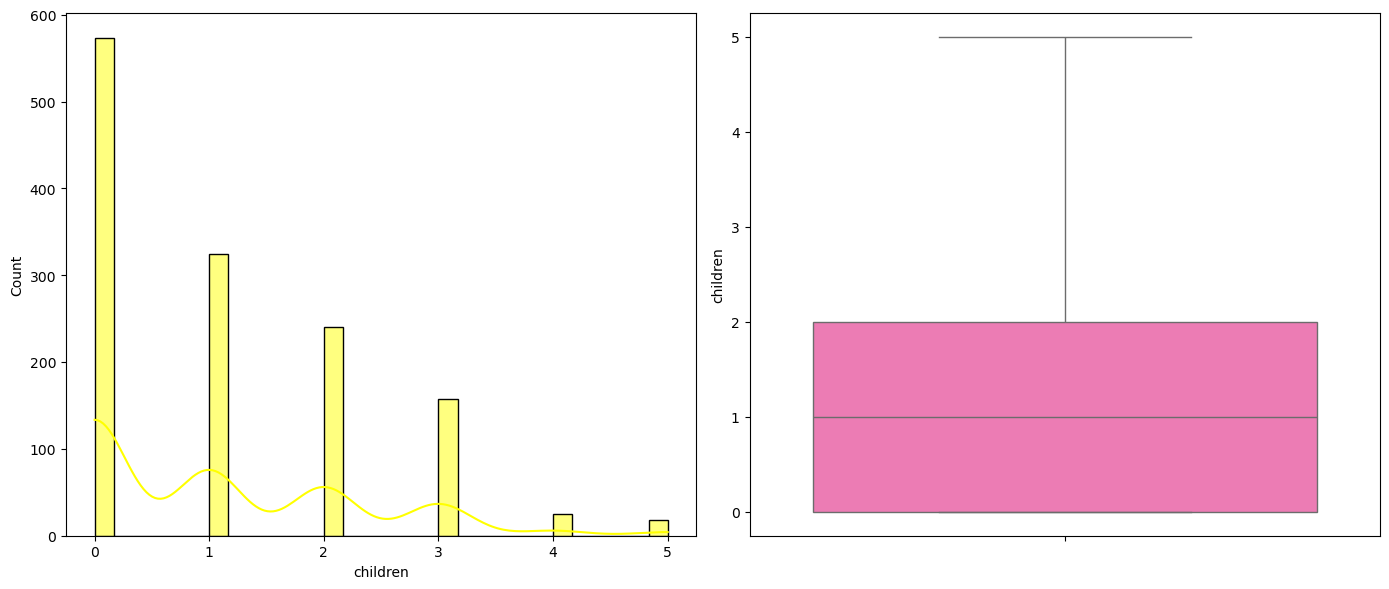

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='children', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['children'],color='hotpink')

plt.tight_layout()
plt.show()

##### Age Variable Analysis

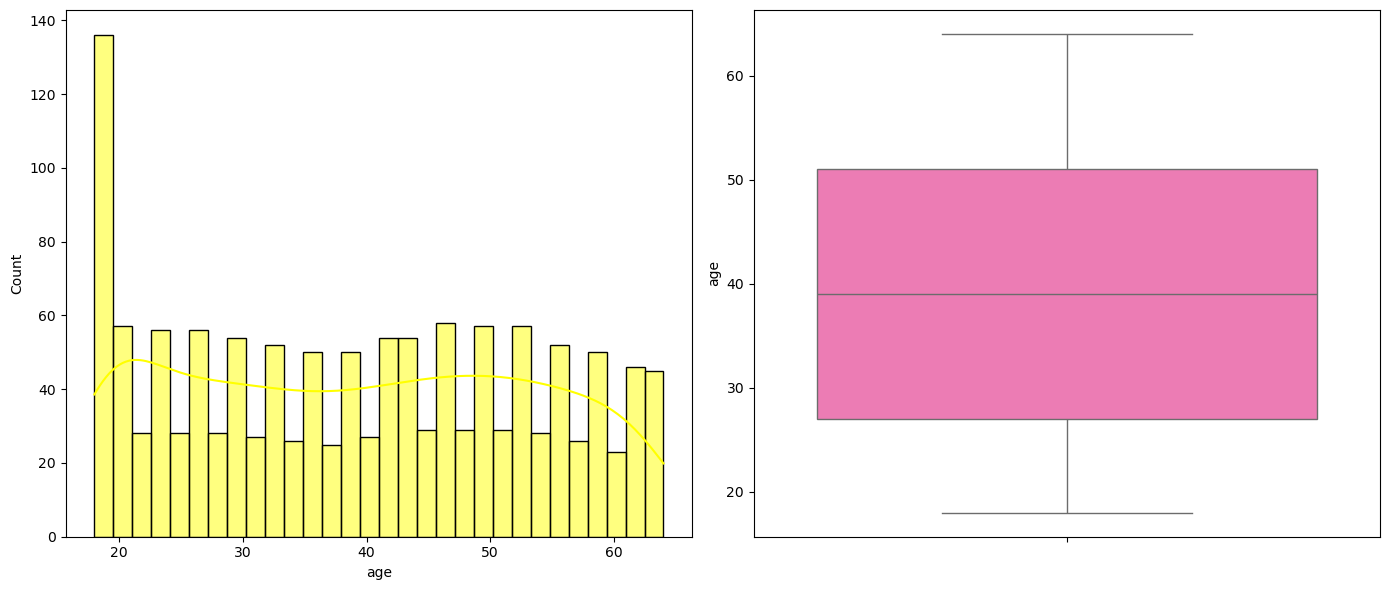

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=df, x='age', bins=30,kde=True,color='yellow')
plt.subplot(122)
sns.boxplot(df['age'],color='hotpink')

plt.tight_layout()
plt.show()

## Bivariate Analysis

Text(0.5, 1.0, 'Charges: Smokers vs Non-Smokers')

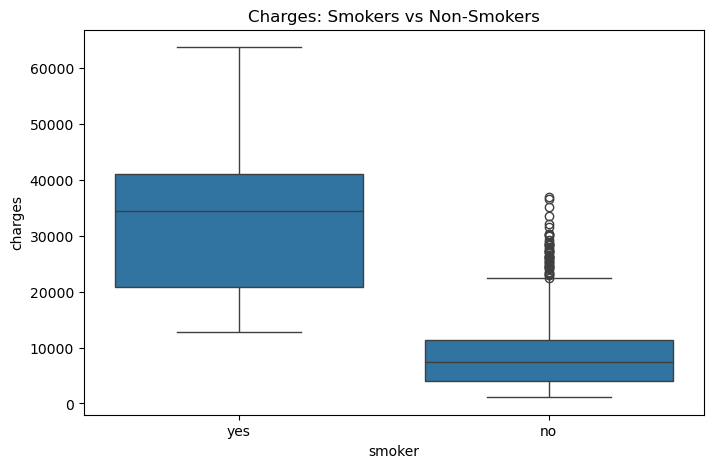

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges: Smokers vs Non-Smokers')

Text(0.5, 1.0, 'Interaction: BMI, Smoking, and Charges')

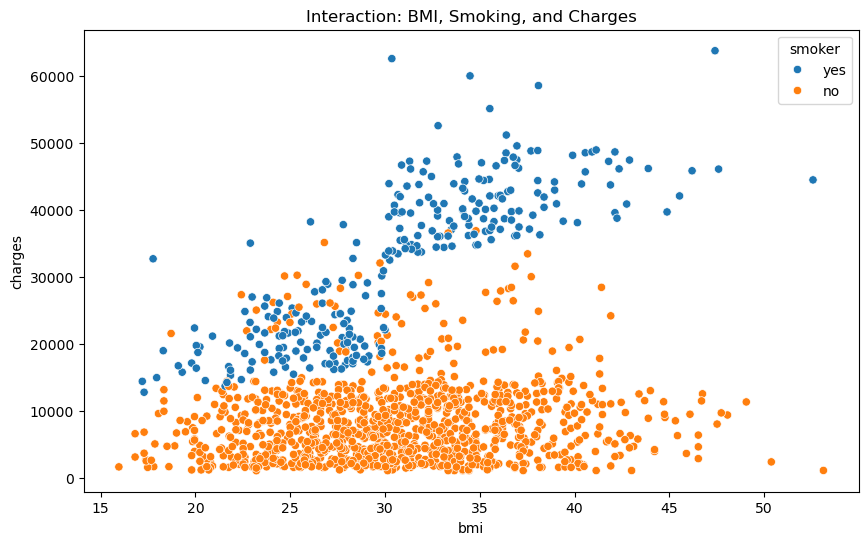

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Interaction: BMI, Smoking, and Charges')

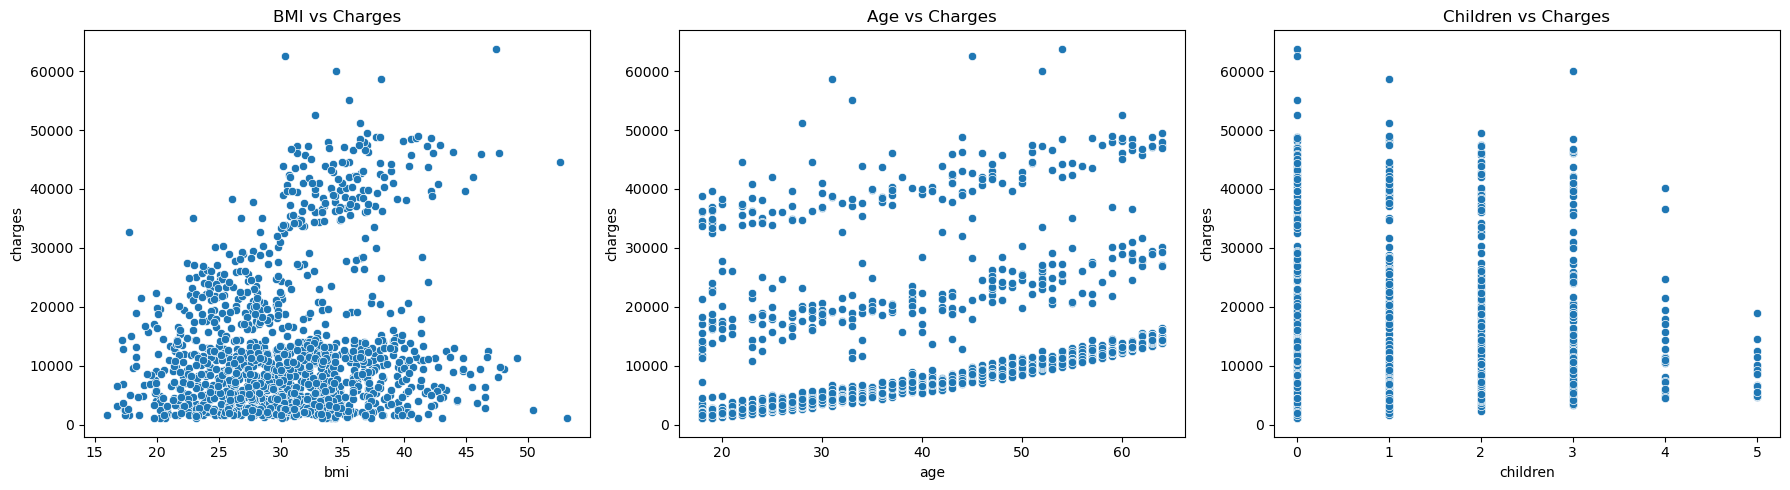

In [25]:
# Numerical Analysis
## Numerical vs numerical = Scatterplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[0])
axes[0].set_title('BMI vs Charges')

sns.scatterplot(x='age', y='charges', data=df, ax=axes[1])
axes[1].set_title('Age vs Charges')

sns.scatterplot(x='children', y='charges', data=df, ax=axes[2])
axes[2].set_title('Children vs Charges')

plt.tight_layout()
plt.show()
 

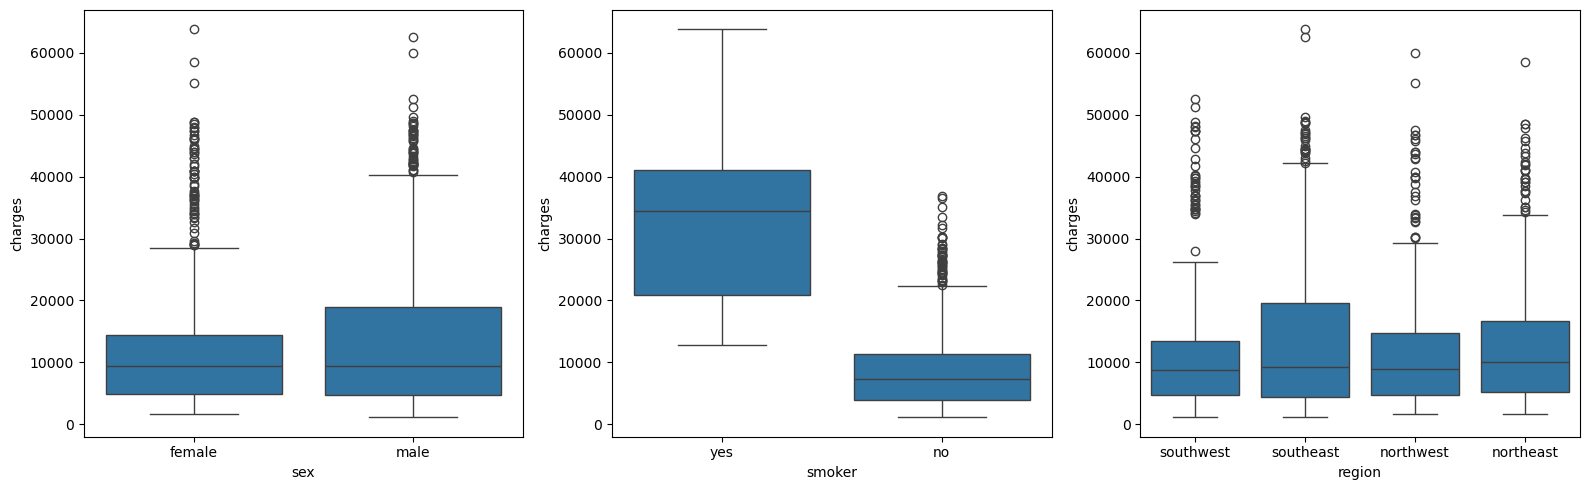

In [26]:
# Categorical Analysis (Boxplots for Outliers/Skew)
## Categorical vs numerical = Boxplots
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.boxplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.boxplot(x='region', y='charges', data=df)

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [27]:
dfn = df.drop(columns=['sex','smoker','region'])

In [28]:
dfn.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


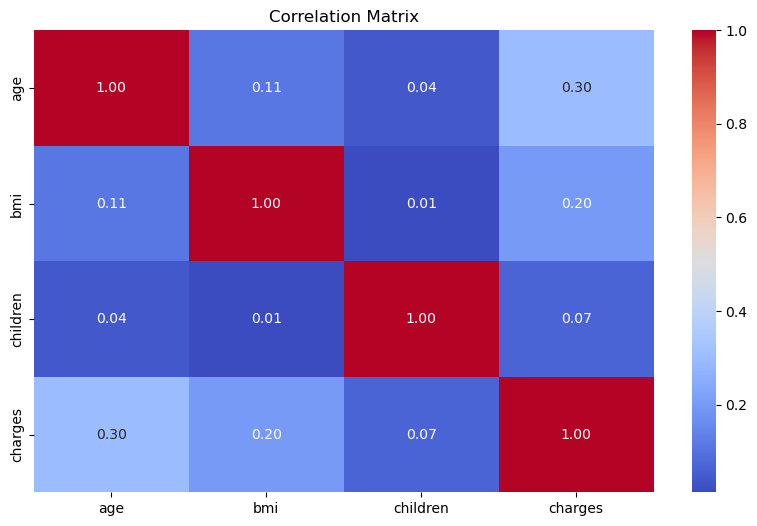

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfn.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [30]:
#🧹 Check for Irrelevant Features

# Correlation matrix
corr_matrix = dfn.corr()
print(corr_matrix['charges'].sort_values(ascending=False)) 

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


## Feature Engineering 

In [31]:
import numpy as np

def engineer_insurance_features(df):
    df = df.copy()
    
    df['obesity'] = (df['bmi'] >= 40).astype(int)
    
    smoker_map = {'yes': 1, 'no': 0}
    df['smoker_obese'] = df['obesity'] * df['smoker'].map(smoker_map)
    
    # Age Binning
    df['age_cat'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=[1, 2, 3, 4])
    
    # Target Log Trasformation
    df['charges'] = np.log1p(df['charges'])
    
    return df

df_engineered = engineer_insurance_features(df)

df_engineered.head()

,age,sex,bmi,children,smoker,region,charges,obesity,smoker_obese,age_cat
0,19,female,27.900,0,yes,southwest,9.734236,0,0,1
1,18,male,33.770,1,no,southeast,7.453882,0,0,1
2,28,male,33.000,3,no,southeast,8.400763,0,0,1
3,33,male,22.705,0,no,northwest,9.998137,0,0,2
4,32,male,28.880,0,no,northwest,8.260455,0,0,2


In [32]:
# Save new dataset 
df_engineered.to_csv('insurance_engineered.csv', index=False)

print("CSV File saved successfully as 'insurance_engineered.csv'")


CSV File saved successfully as 'insurance_engineered.csv'


In [33]:
# Verify your dataset
verify_df = pd.read_csv('insurance_engineered.csv')
print(verify_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'obesity', 'smoker_obese', 'age_cat'],
      dtype='object')
